In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [3]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

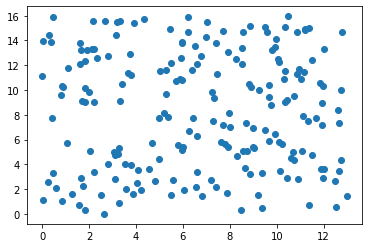

In [4]:
num_points = 200
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))

pts = np.hstack([x, y])
plt.scatter(*pts.transpose())

In [5]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions
# this is a list of all the points that are the verticies in are diagram
verts[0:5, :]

array([[197.07773911,  10.91679198],
       [  3.45803494, 255.05152833],
       [ 68.1792854 ,   7.29405778],
       [ 15.47904437,  12.31863772],
       [ 17.61066807,   3.28321958]])

In [6]:
# Gives us the indicies into verts for the 10th polygon
shapes_ind[10]

[62, 60, -1, 55, 56, 10, 61]

In [7]:
# gives us the points in R2 that actually form the 10 th polygon
verts[shapes_ind[10]]

array([[  8.82152543,   0.94250979],
       [ 11.2192892 , -11.87161745],
       [  6.27974587,   2.80430956],
       [  5.70216646,  -2.19961544],
       [  5.9910412 ,  -1.49163453],
       [  7.5336817 ,   0.7369775 ],
       [  8.47388274,   1.15261785]])

In [8]:
"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

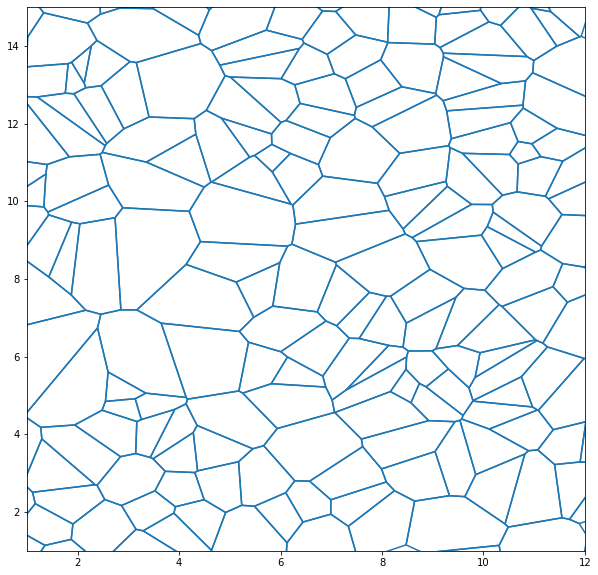

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

In [10]:
# let's just look at one polygon

polygon_ind = 15
polygon = shapes[polygon_ind]

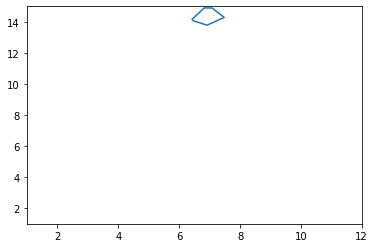

In [11]:
fig, ax = plt.subplots()
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection([polygon])
ax.add_collection(lc)

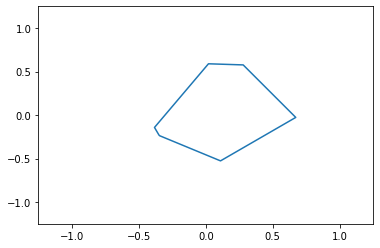

In [12]:
# now we can recenter it
center = np.mean(polygon, axis=0)

fig, ax = plt.subplots()
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

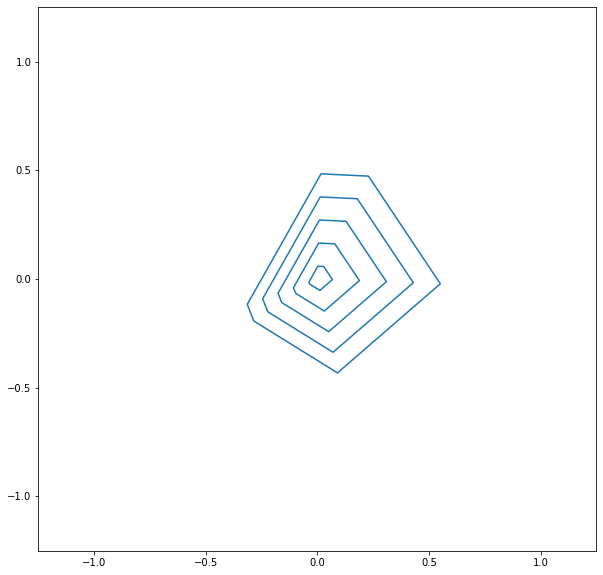

In [13]:
# now we can fill contract it

rescaled = []

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

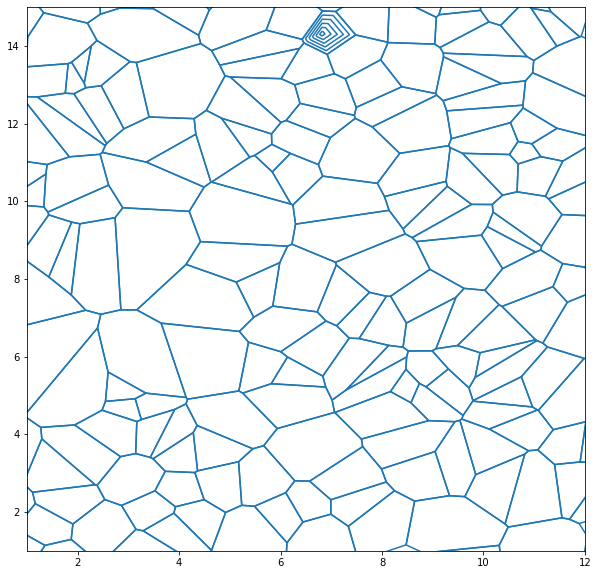

In [14]:
"""
So now we have the fill figured out, and we have to put it back into place!
"""

filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)